# Testnet Block Time Distribution

The analysis is based on the report generated in [ckb-assets](https://github.com/nervosnetwork/ckb-assets/tree/main/analysis/testnet/block-time).

First download the selected XSLX file.

In [15]:
import requests
from pathlib import Path
from IPython.display import FileLink

XSLX_URL = 'https://github.com/nervosnetwork/ckb-assets/raw/main/analysis/testnet/block-time/block_analyzer_20210805095730.xlsx'

local_path = Path('.') / Path(XSLX_URL).name
if not local_path.exists():
    with requests.get(XSLX_URL, allow_redirects=True, stream=True) as req:
        req.raise_for_status()
        with open(local_path, 'wb') as out:
            for chunk in req.iter_content(chunk_size=8192):
                out.write(chunk)

FileLink(local_path)


/home/ian/codebase/nervos/ckb-report-tools/notebooks/testnet/block-time/block_analyzer_20210805095730.xlsx

In [17]:
# Read data into data frame
df = pd.read_excel(local_path, sheet_name='block_intervals', engine='openpyxl')
df

,Block_I_hash,Block_I+1_hash,Block_I+2_hash,Block_I_to(I+1)_interval(secondes),Block_I_to(I+2)_interval(secondes)
0,0x1c62ff6c4434069b94fdbad8df36fd22d104f0bac0ed...,0x271766de294fb3eebb74f39e4635c80e778a508753d7...,0x271766de294fb3eebb74f39e4635c80e778a508753d7...,13.999456,23.999584
1,0x271766de294fb3eebb74f39e4635c80e778a508753d7...,0xa033e4992c4246c2ecd45f7fc7a142d1d0575d989fd9...,0xa033e4992c4246c2ecd45f7fc7a142d1d0575d989fd9...,10.000128,11.000241
2,0xa033e4992c4246c2ecd45f7fc7a142d1d0575d989fd9...,0xee5e2fe9f5f6577be58d1ef397637bd4f7ba318c397a...,0xee5e2fe9f5f6577be58d1ef397637bd4f7ba318c397a...,1.000113,5.999930
3,0xee5e2fe9f5f6577be58d1ef397637bd4f7ba318c397a...,0x953d6322c5c7904ad237da7a91ff1eec578585956cea...,0x953d6322c5c7904ad237da7a91ff1eec578585956cea...,4.999817,35.999975
4,0x953d6322c5c7904ad237da7a91ff1eec578585956cea...,0x53c213d04fab50a2bbb6672a2662ed7f02bf00d281ec...,0x53c213d04fab50a2bbb6672a2662ed7f02bf00d281ec...,31.000158,33.000497
...,...,...,...,...,...
75512,0x3be80c09366938cf04160127048794711fe1b1001bb0...,0xe51d8f81259b59ff1e3586b19dacb0c2e77a26473c67...,0xe51d8f81259b59ff1e3586b19dacb0c2e77a26473c67...,20.000177,22.000704
75513,0xe51d8f81259b59ff1e3586b19dacb0c2e77a26473c67...,0xbe9b76ed3aec498b576deeaf8b3ca8095ffd83e5c748...,0xbe9b76ed3aec498b576deeaf8b3ca8095ffd83e5c748...,2.000527,13.999767
75514,0xbe9b76ed3aec498b576deeaf8b3ca8095ffd83e5c748...,0x48b0ddc10c039f86173338e13430a11d2d88fbdafe2e...,0x48b0ddc10c039f86173338e13430a11d2d88fbdafe2e...,11.999240,17.000060
75515,0x48b0ddc10c039f86173338e13430a11d2d88fbdafe2e...,0x229e8c7a50a4480d49c062adeee5ced92ed41eb57fa9...,NaN,5.000820,NaN


array([[<AxesSubplot:title={'center':'Block_I_to(I+1)_interval(secondes)'}>]],
      dtype=object)

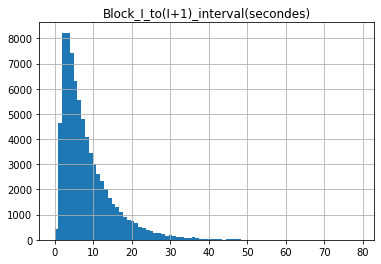

In [24]:
ONE_BLOCK_INTERVAL_COL_NAME = 'Block_I_to(I+1)_interval(secondes)'

df.hist(ONE_BLOCK_INTERVAL_COL_NAME, bins=80)

From the histogram chart, the block time looks like a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).